# TSSL Exam - 2020-10-21
This notebook contains the four exam problems.

* Please write your solutions directly in the notebook.

* Your submission should consist of: (i) an executable notebook (.ipynb file), **and** a pdf printout of the same notebook. Please make sure that all your answers are visible in the pdf file. To generate the pdf file from the notebook, you can either go to _File->Download as->PDF via LaTeX (.pdf)_, or go to _File->Print preview_ and "print" the web page as a pdf file.

* If relevant, hand-written calculations and drawings can be submitted alongside the notebook/pdf printout. Please scan/take a picture of your hand-written solutions and upload them in pdf, jpg or png format alongside the notebook. If you use this option, you need to **clearly mark in the notebook** that part of the solution is attached as a separate file and provide a reference to that file.  

* Apart from the exception mentioned above, the notebook should be self-contained and executable. Standard packages and the `tssltools` module that is **distributed along with the exam** may be imported. This module contains **all the auxiliary code that you have used in the labs**, i.e. from the `tssltools_lab#` files, regardless of whether or not these functions/classes are relevant for solving the exam. The `tssltools` module also contains some additional code that can come in handy (in that case, the relevant code is referred to in the problem formulation).
If you rely on external code that you have written (e.g. when solving the lab assignments in the course) it should be copied in to the notebook.

* **Responsible teacher:** Fredrik Lindsten, available over email (fredrik.lindsten@liu.se) or phone (070 085 07 90) during the exam.  


### Grades
The maximum number of points is 40 (8+13+12+7 for the four problems, respectively). The _tentative_ levels for the grades (A-F) are:
- A=37-40 points
- B=33-36 points
- C=23-32 points
- D=19-22 points
- E=15-18 points
- F=0-14 points (fail)

In [62]:
import pandas  # Loading data / handling data frames
import numpy as np
import matplotlib.pyplot as plt
import tssltools

In [2]:
# Default figure size for plots.
# Feel free to change this if the suggested setting results in too small/large plots on your machine!
plt.rcParams["figure.figsize"] = (10,6)

## Problem 1:
(8 points)

**a)** The file `data_problem1.csv` contains a sequence of observations. In this problem you should do the following:

1. Load the data and split it into 80 % training and 20 % validation data.
2. Pre-process the data as you find appropriate.
3. Produce mean-squared-error curves for model orders in the range $p=1,\dots,10$. Plot both training and validation errors as two separate curves.
4. Based on the error curves, pick a final model order $p$ that you think is appropriate. Motivate your choice!

_Hint:_ You can use the functions `fit_ar` and `predict_ar_1step` from lab 1 (available in `tssltools`).  

<div style="text-align: right"> (5p) </div>


In [3]:
data=pandas.read_csv('data_problem1.csv',header=0)
y = data['Data'].values

**Solution:**

In [11]:
#1
#split the data
ndata = len(y)
ntrain = int(ndata*0.8)
ntest = ndata-ntrain
train = y[:ntrain]

test = y[ntrain:]

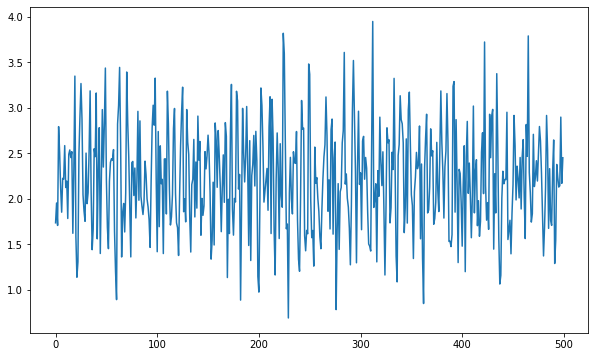

In [26]:
plt.plot(y)

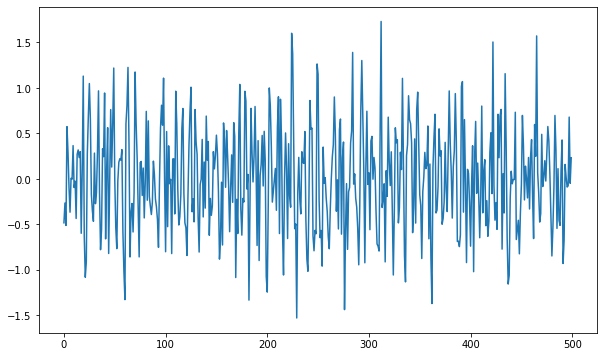

In [59]:
#2 detrend

yt = np.array(y)
a = range(1,500)
t= np.array(a).reshape((-1,1))


mean = np.mean(yt)

dyt = yt -mean
plt.plot(dyt)

Produce mean-squared-error curves for model orders in the range  𝑝=1,…,10 . Plot both training and validation errors as two separate curves.

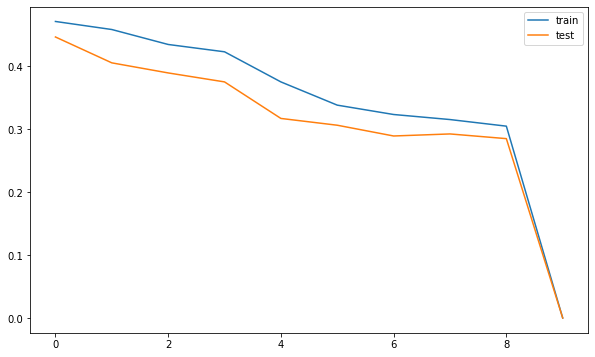

In [88]:
# 3
from tssltools import fit_ar, predict_ar_1step

MSE_train = np.zeros(10)
MSE_test = np.zeros(10)
p = np.array(range(1,10))

for i in p:
    theta = fit_ar(train, i)
    y_pred = predict_ar_1step(theta,dyt)
    res = y_pred - dyt[i:]
    MSE_train[i-1] = np.mean((res[:ntrain])**2)
    MSE_test[i-1] = np.mean((res[ntrain:])**2)
plt.plot(MSE_train)
plt.plot(MSE_test)
plt.legend(["train","test"])

Based on the error curves, pick a final model order  𝑝  that you think is appropriate. Motivate your choice!

**Ans.4**

I picked the p=10, because using a bigger p meaning that the model use more information to do the prediction, so that the model will perfrom better.

___

**b)** For certain model orders $p$, the training error is larger than the validation error! Explain how this can possibly be the case (despite the fact that the model is optimized to minimize the training error).

<div style="text-align: right"> (2p) </div>

Solution**
In this case if training error larger than the validation error, meaning that when the training data is underfitting when fitting with the coefficient and prediction, however, it fits better on the validation data using the same coefficient doing the prediction.


___

**c)** Using the final model from part a), predict the value of $y_{n+1}$, where $n$ is the total number of data points above (both train and validation). What is the value of your prediction?

_Hint: If you were not able to solve part a), you can still solve this part of the problem. In that case, do the prediction using an AR($p=3$) model with a randomly chosen parameter vector._

<div style="text-align: right"> (1p) </div>

**Solution**

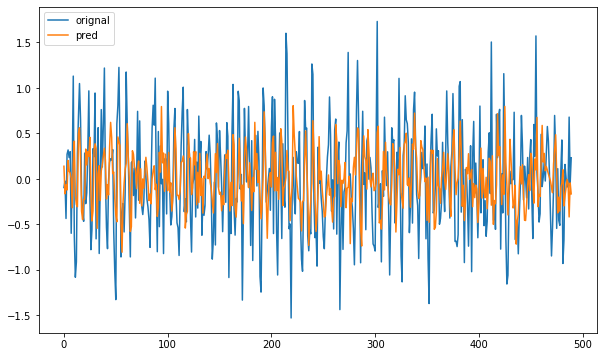

In [98]:
p=10
# C

p = 10
theta = fit_ar(train, p)
y_pred = predict_ar_1step(theta,dyt)

plt.plot(dyt[p:])
plt.plot(y_pred)
plt.legend(["orignal","pred"])

## Problem 2:
(13 points)

**a)** In this problem we will study a simple **target tracking** model using a **LGSS** model
$$
    \begin{cases} \alpha_t = T \alpha_{t-1} + R \eta_t, & \eta_t \sim \mathcal{N}(0,Q), \\ y_t = Z \alpha_t + \varepsilon_t, & \varepsilon_t \sim \mathcal{N}(0,H). \end{cases}
$$

The model can be described as follows. Let the position of the target at time $t$ be $x_t$ and the velocity be $\dot{x}_t$. Betweeen each observation the time increment is $\Delta$, such that $x_{t+1} \approx x_t + \Delta \dot{x}_t$. The velocity is assumed to be approximataley constant. However, to add some stochasticity to the model we add a random acceleration at each time step. We model this acceleration as a Gaussian random variable $\eta_t$ with mean $0$ and variance $\sigma_{\eta}^2$. With the random acceleration, the velocity is updated as $\dot{x}_{t+1} = \dot{x}_t + \Delta \eta_t$. Furthermore, it can be shown that the acceleration will have a direct impact on the position update, so we model this as: $x_{t+1} = x_t + \Delta \dot{x}_t + \frac{\Delta^2}{2} \eta_t$.

Finally our observation is the position with additive Gaussian noise with mean 0 and variance $\sigma_{\varepsilon}^2$.

The datafilte `data_problem2a.csv` contains a sequence of observations from this model. Using this data you are tasked to do the following:

1. Setup the complete model by writing down the matrices $T$, $R$, $Q$, $Z$, and $H$. Also specify your hidden states $\alpha_t$. Remember to motivate your choices of matrices.
2. Set the initial means of the position and velocity based on the data, i.e. to the initial position and velocity implied by the data. Set the initial covariance matrix to be the identity matrix multiplied by 10.
3. Implement and run the Kalman filter for the above model using $\Delta = 0.2$, $\sigma_{\varepsilon}^2 = 1$, and $\sigma_{\eta}^2 = 0.1$.
4. Plot the filtered position (filter mean) together with the observations vs time.
5. Report the log-likelihood of the model on this data.

_Hint: The `LGSS` and `kfs_res` classes used in Lab 2 are available in the `tssltools` module._

<div style="text-align: right"> (7p) </div>


**Solution**

1000

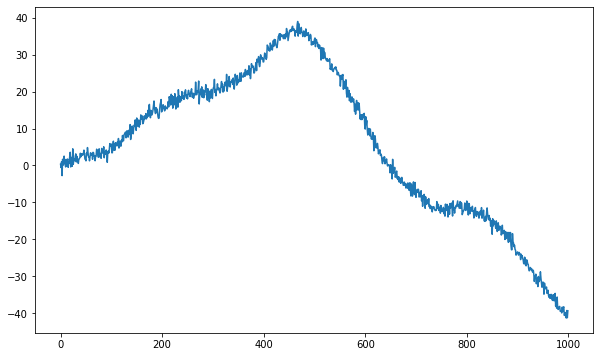

In [408]:
from tssltools import LGSS, kfs_res
data=pandas.read_csv('data_problem2a.csv',header=None)
plt.plot(data)

y2 = np.array(data)
len(y2)

Setup the complete model by writing down the matrices  𝑇 ,  𝑅 ,  𝑄 ,  𝑍 , and  𝐻 . Also specify your hidden states  𝛼𝑡 . Remember to motivate your choices of matrices.

 $x_{t+1} = x_t + \Delta \dot{x}_t + \frac{\Delta^2}{2} \eta_t$.
 
 $x_{t+1} = [ \frac{1  \ \ \Delta} {0 \ \ 1 }]x_k + [ \frac {\frac{\Delta^2}{2}}{\Delta} ] \eta_t $
 
 
 so, the matrix T_v=$[ \frac{1  \ \ \Delta} {0 \ \ 1 }]$, R_v =$[ \frac {\frac{\Delta^2}{2}}{\Delta} ] $, Z_v=$[1 \ \ 0 ]$ for velocity
 
 

In [468]:
#1. set up the model

# Since the model is contained 2nd derivative on the hidden state. so we use k=2
from scipy.linalg import block_diag

T_mu = np.array([[2,-1],[1,0]])
R_mu = np.array([[1],[0]])
Z_mu = np.zeros(shape=(1,2))
Z_mu[0,0] =1
Z_mu.shape

delta=0.2
T_v = np.array([[1,delta],[0,1]])
R_v = np.zeros((2,1))
R_v[0,0]= (delta**2)/2
R_v[1,0 ]= delta
Z_v = np.array([[1,0]])


T = block_diag(T_mu, T_v)
R = block_diag( R_mu, R_v)
Z = np.concatenate( (Z_mu, Z_v),axis=1)



print( "Size of T:" ,np.shape(T))
print( "Size of R:",np.shape(R))
print( "Size of Z:", np.shape(Z))

# alpha_t = [mu_t mu_t-1]

Size of T: (4, 4)
Size of R: (4, 2)
Size of Z: (1, 4)


Set the initial means of the position and velocity based on the data, i.e. to the initial position and velocity implied by the data. Set the initial covariance matrix to be the identity matrix multiplied by 10.

In [465]:
a1 = np.zeros((4,1))
a1[0:2] = y2[0]
P1 =  np.identity(4)*100

sigmatrend2 = 1
sigmav2= 0.1

Q = np.array([[sigmatrend2, 0.], [0., sigmav2]])

a1.shape

(4, 1)

Implement and run the Kalman filter for the above model using  Δ=0.2 ,  𝜎2𝜀=1 , and  𝜎2𝜂=0.1 .
Plot the filtered position (filter mean) together with the observations vs time.
Report the log-likelihood of the model on this data.

In [469]:
model = LGSS(T, R, Q, Z, sigma_eps, a1, P1)

help(model.get_params)


Help on method get_params in module tssltools:

get_params() method of tssltools.LGSS instance
    Return all model parameters.
    
    T, R, Q, Z, H, a1, P1 = model.get_params()



In [456]:



def kalman_filter(y, model: LGSS):
    n = len(y)
    d = model.d  # State dimension
    alpha_pred = np.zeros((d, 1, n)) #38,1,997
    P_pred = np.zeros((d, d, n)) #
    alpha_filt = np.zeros((d, 1, n))
    P_filt = np.zeros((d, d, n))
    y_pred = np.zeros(n)
    F_pred = np.zeros(n)

    T, R, Q, Z, H, a1, P1 = model.get_params()  # Get all model parameters (for brevity)

    for t in range(n):
        # Time update (predict)
        
        if t==0:
        #initial predict alpha/P
            alpha_pred[...,t] = a1
            P_pred[...,t] = P1
        
        else:
            alpha_pred[...,t] = T@alpha_filt[...,t-1]
            P_pred[...,t]= T@P_filt[...,t-1]@T.T + R@Q@R.T
            
        # Compute prediction of current output
        # ADD CODE HERE
        y_pred[t] = Z@alpha_pred[...,t]
        F_pred[t] = Z@P_pred[...,t]@Z.T + H
        
        # Measurement update (correct)
        # ADD CODE HERE
        
        if np.isnan(y[t]):
        
            alpha_filt[...,t] = alpha_pred[...,t]
            P_filt[...,t] = P_pred[...,t]
        
        else:
            K = P_pred[...,t]@Z.T* (F_pred[t]**(-1)) ##k is (38,)
            #K = K.reshape((d,1)) #make k into (38,1)
            alpha_filt[...,t]= alpha_pred[...,t] + K*(y[t] - y_pred[t])
            I = np.identity(T.shape[0])
            P_filt[...,t] = (I - K*Z)@P_pred[...,t]


    kf = kfs_res(alpha_pred, P_pred, alpha_filt, P_filt, y_pred, F_pred)

    return kf

Plot the filtered position (filter mean) together with the observations vs time.
Report the log-likelihood of the model on this data.

(4, 1, 1000)


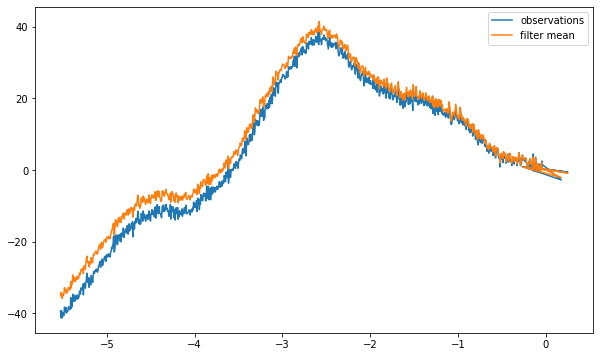

In [470]:
kf = kalman_filter(y2, model)

print(kf.alpha_filt.shape)


plt.figure(0)
plt.plot(kf.alpha_filt[2,0,:],y2)
plt.plot(kf.alpha_filt[2,0,:],kf.alpha_filt[0,0,:])
#plt.plot(kf.alpha_filt[2,0,:],kf.alpha_filt[2,0,:])
plt.legend(["observations","filter mean"])


In [459]:
# log lik

Fpred = kf.F_pred[:n]
ypred = kf.y_pred[:n]


#logllh =  -0.5*sum(np.log(F_pred) + (y[:n]- y_pred).T@(F_pred**(-1))*(y[:n]- y_pred) )


logllh2=np.zeros((n))
for t in range(n):
    logllh2[t] = ( np.log(Fpred[t]) + (y[t]- ypred[t])*(Fpred[t]**(-1))*(y[t]- ypred[t]) )

#(y[:n]- y_pred).T@(F_pred**(-1))*(y[:n]- y_pred)
-0.5*sum(logllh2)

-1671.8273042940507

___

**b)** Often we are in the situation of missing data. In this task you will study the difference between the smoothing and filtering distributions when working with missing data. You should do the following:

1. Remove the data between index 500 and 650 from the data by setting those values to `np.nan`
2. Run the Kalman filter on this new data.
3. Run the Kalman smoother on the same data. The algorithm is provided in `tssltools`
4. Plot the data, the filtered mean and the smoothing mean.
5. Comment on the results

<div style="text-align: right"> (2p) </div>

**Solution**

In [420]:
len(y2)
yy = y2[:,0]
yy.shape
yb.shape

(1000,)

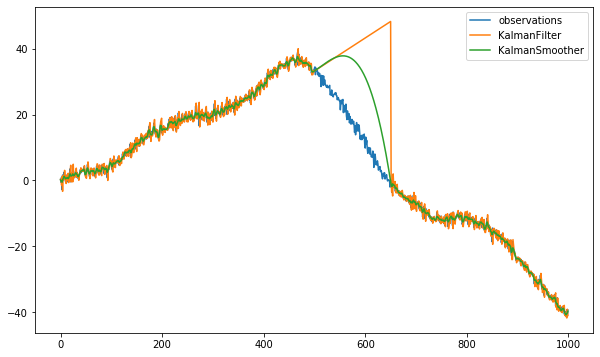

In [426]:
from tssltools import kalman_smoother
yb = np.concatenate( (yy[:500], [np.nan]*150, yy[650:]) )
kf_b = kalman_filter(yb, model ) 

ks_b = kalman_smoother(yb , model, kf_b)

#
plt.plot(y2)
plt.plot(kf_b.y_pred)

y_pred = np.zeros((len(y2)))
#F_pred = np.zeros((len(y)))
for i in range(len(y2)):
    y_pred[i] = Z@ks_b.alpha_sm[...,i]

plt.plot(y_pred)
plt.legend(["observations", "KalmanFilter","KalmanSmoother"])

**ANS**
From the above plot we can see the smoother performs better than the Kalman filter, the reason is the Kalman filter only predict states forward, but the smoother will go forward and backwork which gives the smoother more information to fit the data.

___

**c)** Now we will move away from the one-dimensional target tracking and study target tracking in two-dimensions. The observations are noisy estimates of the position and we again model the system using a LGSS model,
$$
    \begin{cases} \alpha_t = T \alpha_{t-1} + R \eta_t, & \eta_t \sim \mathcal{N}(0,Q), \\ z_t = Z \alpha_t + \varepsilon_t, & \varepsilon_t \sim \mathcal{N}(0,H). \end{cases}
$$

We now have two positions $(x^1_t, x^2_t)$ with their respective velocities $(\dot{x}^1_t, \dot{x}_t^2)$. Both of these dimensions should behave independently exactly like the 1-dimensional case in **a)**.

The observations $y_t$ should be a noisy observation of the position where the noise for each coordinate is independent Gaussian random variables with zero meean and variance $\sigma_{\varepsilon}^2$.

The datafile `data_problem2c.csv` contains a sequence of noisy observations of a target moving in 2d. For this question you should do the following:

1. Write down the matrices and state-vector for this model. You may reference the matrices from **a)** even if you didn't solve that part. Remember to motivate your answer.
2. Set the initial position to be the initial observation for both coordinates and the initial velocities to be the velocities implied by the first two observations. Let the initial variance estimate `P1` be a diagonal matrix with $10$ on the diagonal.
3. Implement and run the Kalman filter for the above model using $\Delta = 0.2$, $\sigma_{\varepsilon}^2 = 1$, and $\sigma_{\eta}^2 = 0.1$.
4. Plot the filtered trajectory, i.e. the filtered mean estimate of $x^2_t$ vs $x^1_t$.

_Hint: Now that the dimension of the observation is 2 some modifications to the Kalman filter is necessary. Copy the Kalman filter code from above and make the necessary adjustments. The code below imports the data and reshapes it into the shape `(2,1,1001)`, use the same shape for `y_pred` and let `F_pred` have the shape `(2,2,1001)`. Make sure you use matrix multiplication where needed._

<div style="text-align: right"> (4p) </div>

In [526]:
data2c = pandas.read_csv('data_problem2c.csv', header=None).values.reshape((2,1,1001))



yc = data2c
data2c.shape

(2, 1, 1001)

**Solution**

In [513]:
#1. set up the model

# Since the model is contained 2nd derivative on the hidden state. so we use k=2
from scipy.linalg import block_diag

T_mu = np.array([[2,-1],[1,0]])
R_mu = np.array([[1],[0]])
Z_mu = np.zeros(shape=(1,2))
Z_mu[0,0] =1
Z_mu.shape

delta=0.2
T_v = np.array([[1,delta],[0,1]])
R_v = np.zeros((2,1))
R_v[0,0]= (delta**2)/2
R_v[1,0 ]= delta
Z_v = np.array([[1,1]])


T = block_diag(T_mu, T_v)
R = block_diag( R_mu, R_v)
Z = np.concatenate( (Z_mu, Z_v),axis=1)



print( "Size of T:" ,np.shape(T))
print( "Size of R:",np.shape(R))
print( "Size of Z:", np.shape(Z))

# alpha_t = [mu_t mu_t-1]

Size of T: (4, 4)
Size of R: (4, 2)
Size of Z: (1, 4)


In [514]:
a1 = np.zeros((4,1))
a1[0:2] = y2[0]
P1 =  np.identity(4)*10

sigmatrend2 = 1
sigmav2= 0.1

Q = np.array([[sigmatrend2, 0.], [0., sigmav2]])

a1.shape

(4, 1)

In [515]:
model = LGSS(T, R, Q, Z, sigma_eps, a1, P1)

help(model.get_params)

Help on method get_params in module tssltools:

get_params() method of tssltools.LGSS instance
    Return all model parameters.
    
    T, R, Q, Z, H, a1, P1 = model.get_params()



In [523]:


def kalman_filter(y, model: LGSS):
    n = 1001
    d = model.d  # State dimension
    alpha_pred = np.zeros((d, 1, n)) #38,1,997
    P_pred = np.zeros((d, d, n)) #
    alpha_filt = np.zeros((d, 1, n))
    P_filt = np.zeros((d, d, n))
    y_pred = np.zeros((2,2,1001))
    F_pred = np.zeros((2,2,1001))

    T, R, Q, Z, H, a1, P1 = model.get_params()  # Get all model parameters (for brevity)

    for t in range(n):
        # Time update (predict)
        
        if t==0:
        #initial predict alpha/P
            alpha_pred[...,t] = a1
            P_pred[...,t] = P1
        
        else:
            alpha_pred[...,t] = T@alpha_filt[...,t-1]
            P_pred[...,t]= T@P_filt[...,t-1]@T.T + R@Q@R.T
            
        # Compute prediction of current output
        # ADD CODE HERE
        y_pred[t] = Z@alpha_pred[...,t]
        F_pred[t] = Z@P_pred[...,t]@Z.T + H
        
        # Measurement update (correct)
        # ADD CODE HERE
        
        if np.isnan(y[...,t]):
        
            alpha_filt[...,t] = alpha_pred[...,t]
            P_filt[...,t] = P_pred[...,t]
        
        else:
            K = P_pred[...,t]@Z.T* (F_pred[t]**(-1)) ##k is (38,)
            #K = K.reshape((d,1)) #make k into (38,1)
            alpha_filt[...,t]= alpha_pred[...,t] + K*(y[t] - y_pred[t])
            I = np.identity(T.shape[0])
            P_filt[...,t] = (I - K*Z)@P_pred[...,t]


    kf = kfs_res(alpha_pred, P_pred, alpha_filt, P_filt, y_pred, F_pred)

    return kf

In [524]:
kf = kalman_filter(yc, model)

print(kf.alpha_filt.shape)


plt.figure(0)
plt.plot(kf.alpha_filt[2,0,:],y2)
plt.plot(kf.alpha_filt[2,0,:],kf.alpha_filt[0,0,:])
plt.figure(1)
plt.plot(kf.alpha_filt[3,0,:],y2)
plt.plot(kf.alpha_filt[3,0,:],kf.alpha_filt[2,0,:])
plt.legend(["observations","filter mean"])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Problem 3:
(12 points)

The file `data_problem3.csv` contains a sequence of observations. We will model this sequence using the following non-linear state space model,
$$
    \begin{cases} \alpha_{t+1} = 0.8 \alpha_t + \frac{\alpha_t}{1 + \alpha_t^2} + \sigma_{\varepsilon} \varepsilon_t, & \varepsilon_t \sim \mathcal{N}(0,1) \\
    y_t = \frac{\alpha_t^2}{20} + \sigma_{\eta} \eta_t & \eta_t \sim \mathcal{N}(0,1).
    \end{cases}
$$
with initial distribution $\alpha_1 \sim \mathcal{N}(2,\sigma_{\varepsilon}^{2})$.

**a)** To implement a bootstrap particle filter we need to perform three operations, propagation, weighting, and resampling. In this problem you should do the following:

1. Find the conditional distribution of $y_t \mid \alpha_t$.

    $g(y_t|\alpha_t)= N(y_t | \frac{\alpha^2_t}{20} , \sigma_\eta^2)$
2. Implement a function that takes $N$ particles $\alpha_t^i$ and propagates them to $\alpha_{t+1}^i$.
3. Implement a function that takes $N$ particles $\alpha_t^i$ and an observation $y_t$ and calculates the log-weights $\log \omega_t^i$.
<div style="text-align: right"> (5p) </div>

**Solution:**

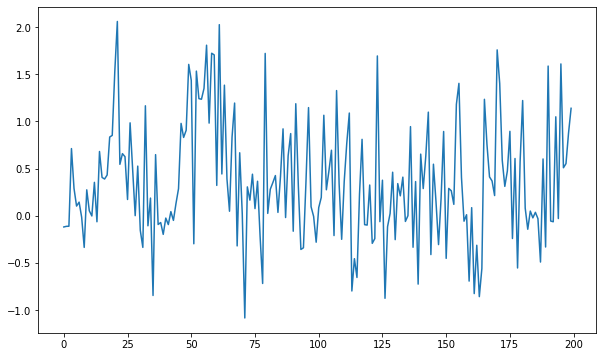

In [211]:
data=pandas.read_csv('data_problem3.csv',header=None)
#plt.plot(data)

len(data)
plt.plot(data)

In [236]:
# a
yt = np.array(data)

#2
def propagate(particle, sigmaeps,N):
    particles = 0.8*particle + particle/(1+particle**2) + sigmaeps*np.random.rand(1)
    return(particles)
#3
def logwgtfun(alpha,y,sigmaeta2):
    logwgt = -0.5*np.log(2*np.pi*sigmaeta2)-0.5* ((y-(alpha**2)/20)**2)/ (2*sigmaeta2)
    return logwgt

def exp_norm(logwgt):
    n = np.shape(logwgt)[0]
    wgt = np.zeros((n))
    maxlogwgt = max(logwgt)
    
    logwgt = logwgt - maxlogwgt
    wgt = np.exp(logwgt)/np.sum(np.exp(logwgt))

    
    return wgt


In [135]:
#for t in range(200-1):
#    alpha[t+1] = 0.8*alpha[t] + alpha[t]/(1+alpha[t]**2) + np.random.randn(1)*np.random.randn(1)
#    y[t] = (alpha[t]**2)/20 +  np.random.randn(1)*np.random.randn(1)

----

**b)** using the functions from the previous part implement a **Bootstrap Particle Filter** that runs on the data. You should solve the following parts:

1. Set the parameters $\sigma_{\varepsilon} = 1$ and $\sigma_{\eta} = 0.5$
2. Use the bootstrap particle filter to calculate the filtered variance of the state-process.
$$
    \mathbb{V}[\alpha_t \mid y_{1:t}] = \mathbb{E}[\alpha_t^2 \mid y_{1:t}] - \mathbb{E}[\alpha_t \mid y_{1:t}]^2
$$
3. Provide a plot of your variance estimates and provide a numerical estimate to $\sum_{t=1}^{n} \mathbb{V}[\alpha_t \mid y_{1:t}]$

Use $N = 200$ particles when performing your estimates.

If you failed to do the first part you can use the functions `propagate_wrong` and `logweight_fun_wrong` from the `tssltools` module to implement and run your bootstrap particle filter.

<div style="text-align: right"> (7p) </div>

**Solution**

In [246]:
sigmaeps = 1
sigmaeta = 0.5
N = 200

def BPF(y , N, sigmaeps, sigmaeta):
    n = len(y)
    d = 1  
    # Allocate memory
    particles = np.zeros((d, N, n), dtype = float)  # All generated particles
    logW = np.zeros((1, N, n))  # Unnormalized log-weight
    W = np.zeros((1, N, n))  # Normalized weight
    alpha_filt = np.zeros((d, 1, n))  # Store filter mean
    Var = np.zeros((n)) # store variance
    sigmaeps2 = sigmaeps**2
    sigmaeta2 = sigmaeta**2
    
    # Filter loop
    for t in range(n):
        # Sample from "bootstrap proposal"
        if t == 0:
            particles[:, :, 0] = propagate(np.random.normal(2,sigmaeps,N), sigmaeps,N) # Initialize from p(alpha_1)
        else:
            # Propagate according to dynamics
            ind = np.random.choice(N, N, replace=True, p=W[0, :, t-1])
            resampled_particles = propagate(particles[:,ind,t-1], sigmaeps,N)
            particles[:, :, t] = resampled_particles

        # Compute weights
        logW[0, :, t] = logwgtfun(particles[...,t],y[t],sigmaeta2) 
        W[0, :, t] = exp_norm(logW[0, :, t])

        # Compute filter estimates
        alpha_filt[:, 0, t] = particles[:,:,t]@W[0,:,t]#/np.sum(W[0,:,t])
        
        # compute var
        Var[t] = np.mean(y-alpha_filt[:,0,t])**2
        
    return alpha_filt, particles, W, Var
    
    
    

In [249]:

alpha_filt, particles, W,Var = BPF(yt, N, sigmaeps, sigmaeta)

W.shape

(1, 200, 200)

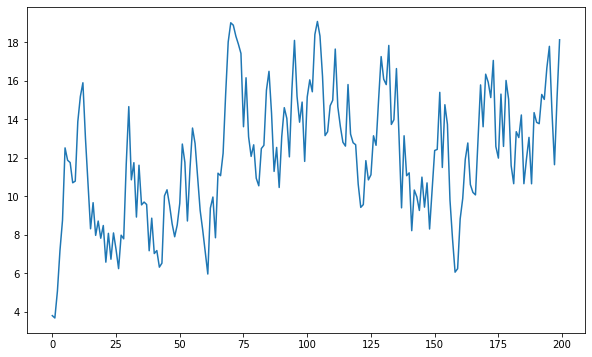

In [250]:
plt.plot(Var)



## Problem 4:
(7 points)

In this problem we will revisit the Sunspot data and RNN model from Lab 4.

In [500]:
# Load TF/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [501]:
# Read the data
data=pandas.read_csv('Sunspots.csv',header=0)
dates = data['Date'].values
y = data['Monthly Mean Total Sunspot Number'].values
ndata=len(y)

# We define a train/test split, here with 70 % training data
ntrain = int(ndata*0.7)
ntest = ndata-ntrain
print(f'Total number of data points: {ndata}')
print(f'Number of training data points: {ntrain}')

MAX_VAL = 400
y = y/MAX_VAL

Total number of data points: 3252
Number of training data points: 2276


We will only consider computing predictions, so we load a pretrained model from the lab.

In [502]:
# A stacked model with 3 layers of LSTM cells, two Dense layers with Relu activation and a final linear output layer
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, batch_input_shape=(1,None,1), return_sequences=True, stateful=True),
  tf.keras.layers.LSTM(64, batch_input_shape=(1,None,1), return_sequences=True, stateful=True),
  tf.keras.layers.LSTM(64, batch_input_shape=(1,None,1), return_sequences=True, stateful=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (1, None, 64)             16896     
_________________________________________________________________
lstm_13 (LSTM)               (1, None, 64)             33024     
_________________________________________________________________
lstm_14 (LSTM)               (1, None, 64)             33024     
_________________________________________________________________
dense_12 (Dense)             (1, None, 32)             2080      
_________________________________________________________________
dense_13 (Dense)             (1, None, 16)             528       
_________________________________________________________________
dense_14 (Dense)             (1, None, 1)              17        
Total params: 85,569
Trainable params: 85,569
Non-trainable params: 0
__________________________________________________

In [503]:

model.load_weights('./')




Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7f48d16d8550> and <tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7f48d16d8be0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7f48d16d8be0> and <tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7f48d392f198>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.recurrent_v2.LSTM object at 0x7f48d392f198> and <tensorflow.python.keras.layers.core.Dense object at 0x7f48d392f828>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f48d392f828> and <tensorflow.python.keras.layers.core.Dense object at 0x7f48d392fa58>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f48d392fa58> and <tensorflow.python.keras.l

___

**a)** Using the pretrained model above, compute 1-step predictions for all the _test data points_. That is, compute

\begin{align*}
    &\hat y_{t|t-1}, & t&=n_{\text{train}}+1, \dots, n_{\text{data}}
\end{align*}
Plot the predictions and the test data in the same figure.

Two things that you need to take into consideration:
1. The RNN is trained using $y_{t-1}$ as input and the residual $\tilde y_t = y_t - y_{t-1}$ as output at time $t$.
2. The prediction at time $t$ is allowed to depend on all data points $y_s$ for $1 \leq s < t$. Specifically, since the training data preceeds the test data, the hidden state of the RNN should depend on the training data also when predicting the test data points.

<div style="text-align: right"> (2p) </div>


**Solution**

In [491]:
# Training data
x_train = y[:ntrain-1]  # Input is denoted by x, training inputs are x[0]=y[0], ..., x[ntrain-1]=y[ntrain-1]
yt_train = y[1:ntrain] - x_train  # Output is denoted by yt, training outputs are yt[0]=y[1]-y[0], ..., yt[ntrain-1] = y[ntrain]-y[ntrain-1]

# Test data
x_test = y[ntrain-1:-1]  # Test inputs are x_test[0] = y[ntrain-1], ..., x_test[ntest] = y[n-1]
yt_test = y[ntrain:] - x_test  # Test outputs are yt_test[0] = y[ntrain]-y[ntrain-1], ..., yt_test[ntest] = y[n]-y[n-1] 

# Reshape the data
x_train = x_train.reshape((1,ntrain-1,1))
yt_train = yt_train.reshape((1,ntrain-1,1))
x_test = x_test.reshape((1,ntest,1))
yt_test = yt_test.reshape((1,ntest,1))

x_train.shape
#x_test.shape
#yt_test.shape


(1, 2275, 1)

In [492]:
init_weights = model.get_weights().copy()
model1 = keras.models.clone_model(model)  # This creates a new instance of the same model
model1.set_weights(init_weights)  # We set the initial weights to be the same for all models

In [427]:
model1.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
history = model1.fit(x_train, yt_train,
                     epochs = 200,
                     batch_size = 1, ## one gradient step/epoch => O(n)computation per gradient step
                     verbose = 0, 
                     validation_data = (x_test, yt_test))

In [428]:
yy = y[:-1]
yy = yy.reshape((1,ndata-1,1))

y_pred1 = model1.predict(yy).flatten() + y[:-1]
y_pred1.shape

(3251,)

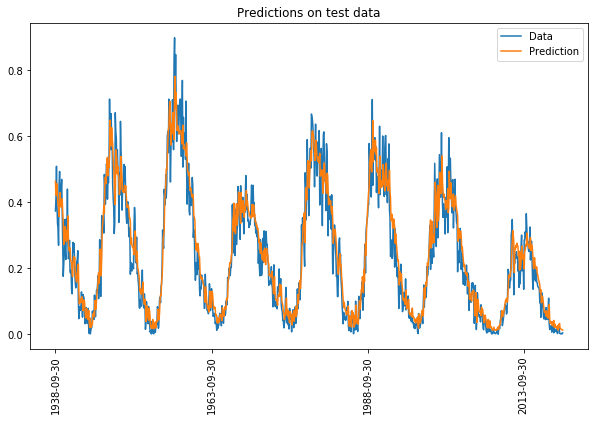

In [432]:
def plot_prediction(y_pred):
    # Plot prediction on test data
    plt.plot(dates[ntrain:], y[ntrain:])
    plt.plot(dates[ntrain:], y_pred[ntrain-1:])
    plt.xticks(range(0, ntest, 300), dates[ntrain::300], rotation = 90);  # Show only one tick every 25th year for clarity
    plt.legend(['Data','Prediction'])
    plt.title('Predictions on test data')
# Plot prediction
plot_prediction(y_pred1)
    

___

**b)** Using the pretrained model above, compute a _free-running simulation_ for all the _test data points_, conditionally on the training data. That is, compute

\begin{align*}
    &\hat y_{t|n_{\text{train}}}, & t&=n_{\text{train}}+1, \dots, n_{\text{data}}
\end{align*}

Not that, in this case, the prediction at time $t > n_{\text{train}}$ is allowed to depend only on the data points $y_{1:n_{\text{train}}}$. As above, this dependence should affect the hidden state of the RNN when predicting the test data points.

Plot the predictions (from the simulation) and the test data in the same figure.

_Hint:_ The RNN hidden state is (re-)initialized to zero by calling `model.reset_states()`, and this is the state we should use at time $t=0$.

_Hint:_ You need to feed the model's predictions back as inputs for computing long-range predictions using the RNN.

<div style="text-align: right"> (4p) </div>


**Solution**

In [504]:
def generator_train_stateful(window_size, model):
    number_of_windows = int( (ntrain-1)/window_size )
    
    while True:
        for i in range(number_of_windows):
            model.reset_states()
            # First time index of window (inclusive)
            start_of_window = window_size*i
            
            # Last time index of window (exclusive, i.e. this is the index to the first time step after the window)
            # Note 3. Python allows using end_of_window > ntrain-1, it will simply truncate the indexing at the final element of the array!
            end_of_window = window_size*(i+1)
            


In [505]:
# Training data
x_train = y[:ntrain-ntest]
yt_train = y[ntest:ntrain] - x_train 

# print(yt_train.shape)
# Test data

x_test = y[ntrain- ntest:-ntest]  
yt_test = y[ntrain:] - x_test  

# Reshape the data
x_train = x_train.reshape((1,ntrain-ntest,1))
yt_train = yt_train.reshape((1,ntrain-ntest,1))
x_test = x_test.reshape((1,ntest,1))
yt_test = yt_test.reshape((1,ntest,1))

x_test.shape
yt_test.shape

(1, 976, 1)

In [506]:
window_size = 100
model1.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
history = model1.fit(generator_train_stateful(window_size, model1),
           epochs = 20, # change it to 20 it's ruuning too slow
           verbose = 0, 
           steps_per_epoch = ntrain/window_size, 
           validation_data = (x_test, yt_test)) 

KeyboardInterrupt: 

In [496]:
yy = y[:-ntest]
yy = yy.reshape((1,ndata-ntest,1))

y_pred1 = model1.predict(yy).flatten() + y[:-ntest]
y_pred1.shape

(2276,)

In [ ]:
# Plot prediction on test data
plot_prediction(y_pred)


### I dont have enough time to run the RNN


___

**c)** The RNN above only used $y_{t-1}$ as input at time $t$. By looking at the raw data we can see a clear (roughly) 11-year cycle. Propose a way to explicitly take this cyclic behavior into account, by augmenting the input to the RNN.

<div style="text-align: right"> (1p) </div>


**Solution**